<a href="https://colab.research.google.com/github/secoxx/IE423/blob/main/task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Initialize

In [2]:
import pandas as pd
import numpy as np

## Load Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/task 1/final_data.csv')

In [5]:
df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [6]:
y = df.loc[:,['current_value']]

In [7]:
X = df.loc[:,['goals','assists','minutes played','days_injured','appearance']]

In [8]:
# View top few rows
X.head()

,goals,assists,minutes played,days_injured,appearance
0,0.000000,0.000000,9390,42,104
1,0.000000,0.000000,1304,510,15
2,0.000000,0.000000,292,697,4
3,0.028090,0.056180,6408,175,82
4,0.017889,0.017889,5031,238,63


In [9]:
# Describe columns using basic stats
X.describe()

,goals,assists,minutes played,days_injured,appearance
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000
mean,0.125554,0.086978,2470.789381,117.961689,36.407011
std,0.235585,0.143351,2021.703271,175.206827,26.526541
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,660.000000,0.000000,12.000000
50%,0.045969,0.040773,2101.500000,37.000000,35.000000
75%,0.172263,0.133136,3968.000000,181.000000,59.000000
max,11.250000,4.000000,9510.000000,2349.000000,107.000000


#### Define

In [10]:
import sklearn
from sklearn.tree import DecisionTreeRegressor

# Fix the seed to the random number generator to ensure same results each run.
mdlDtrMlb = DecisionTreeRegressor(random_state=1)

#### Fit

In [11]:
mdlDtrMlb.fit(X,y)

DecisionTreeRegressor(random_state=1)

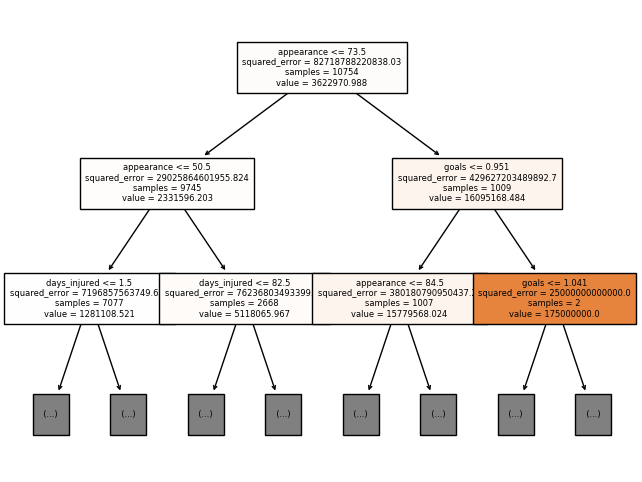

In [12]:
# Show model
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6), dpi=100)
plot_tree(mdlDtrMlb, max_depth=2, feature_names=X.columns, fontsize= 6, filled=True)
plt.show()

We now have a fitted model that we can use to make predictions.

In practice, we'll want to make predictions for new houses coming on the market rather than the houses we already have prices for. But we'll make predictions for the first few rows of the "Training Data" to see how the predict function works.

#### Predict

In [13]:
print('First few players:')
print(X.head())
print('Value predictions:')
print(mdlDtrMlb.predict(X.head()))

First few players:
      goals   assists  minutes played  days_injured  appearance
0  0.000000  0.000000            9390            42         104
1  0.000000  0.000000            1304           510          15
2  0.000000  0.000000             292           697           4
3  0.028090  0.056180            6408           175          82
4  0.017889  0.017889            5031           238          63
Value predictions:
[15000000.  1500000.   600000. 50000000. 40000000.]


In [14]:
y.head()

,current_value
0,15000000
1,1500000
2,600000
3,50000000
4,40000000


#### Evaluate
There are many metrics for summarizing model quality, but we'll start with one called Mean Absolute Error (also called MAE).

In [15]:
from sklearn.metrics import mean_absolute_error

y_pred = mdlDtrMlb.predict(X)
print('MAE:')
print(mean_absolute_error(y,y_pred))

MAE:
24189.87764656906


We'll do train test split to overcome overfitting.

In [16]:
from sklearn.model_selection import train_test_split

# Split features and target into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, test_size=0.2,random_state=1)

In [17]:
# Rebuild model
mdlDtrMlbSpl = DecisionTreeRegressor(random_state=1)
mdlDtrMlbSpl.fit(X_train, y_train)

# Predict test data
y_test_pred = mdlDtrMlbSpl.predict(X_test)

# Evaluate test data actual vs prediction
print('MAE (after train-test-split):')
print(mean_absolute_error(y_test,y_test_pred))

MAE (after train-test-split):
4522946.071663477


As expected (like we've seen in class), error increased a lot compared to when we didn't split because of overfitting.

utexas_ds_orie_divider_gray.png

## Improve Decision Tree Model
We'll change tree's depth to lower the mean absolute error. We'll look at a couple of depths and get the minimum.

In [18]:
# Function to build and return MAE for a given number of max_leaf_nodes
def get_mae(mx_lf_nds, X_trn, X_tst, y_trn, y_tst):
    mdlDtrMlbDpt = DecisionTreeRegressor(max_leaf_nodes=mx_lf_nds, random_state=1)
    mdlDtrMlbDpt.fit(X_trn,y_trn)
    y_tst_prd = mdlDtrMlbDpt.predict(X_tst)
    mae = mean_absolute_error(y_tst, y_tst_prd)
    return(mae)

In [19]:
# Iterate over a list of max_leaf_nodes to determine MAE across all
for i in [5, 50, 500, 50000]:
    mae = get_mae(i, X_train, X_test, y_train, y_test)
    print('Max leaf nodes: ',i, '\t Mean Absolute Error: ',mae)

Max leaf nodes:  5 	 Mean Absolute Error:  3423045.679115105
Max leaf nodes:  50 	 Mean Absolute Error:  3387516.308668454
Max leaf nodes:  500 	 Mean Absolute Error:  3900434.654847962
Max leaf nodes:  50000 	 Mean Absolute Error:  4442486.69230504


The best depth of the tree is at 50 max leaf nodes.

## Build Ensemble Random Forest Model
We'll create multiple decision trees with random forest.

In [24]:
from sklearn.ensemble import RandomForestRegressor

# Define random forest model
mdlRfsMlb = RandomForestRegressor(random_state=1)

# Fit model
mdlRfsMlb.fit(X_train, y_train)

# Predict
y_test_pred = mdlRfsMlb.predict(X_test)

# Evaluate
print('MAE (Random Forest):')
print(mean_absolute_error(y_test,y_test_pred))

<ipython-input-24-f82555515a8a>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mdlRfsMlb.fit(X_train, y_train)


MAE (Random Forest):
3499904.446974263


The Random Forest model reduces the MAE to ~3.5 million from ~4.5 million.

## Results

* At first, we fit a Decision Tree model and got a low mean absolute error, around ~25k. However in this version, data was overfitted.
* Split the data into training and test sets to reduce overfitting.
* By changing the tree depth, we managed to get a lower error. A depth of 50 got us the best results among the 10th powers of 5.
* Ensembled many decision trees using the random forest model, and obtained a better error compared to the decision tree model. The decision tree model yielded ~4.5 mil while random forest yielded ~3.5 mil. However, decision tree with 50 leaf node depth yields 3.38 mil, this might be due to the optimal balance between overfitting and underfitting, as tweaking the leaf node depth results in that way.

utexas_ds_orie_divider_gray.png